# EDA to Prediction (DieTanic)

## Objective:
+ Give an idea of predictive modeling workflow
    - Checking features
    - Addition of new features
    - Machine learning concepts

## Contents:
### Part 1 Exploratory Data Analysis (EDA)
    1) Feature analysis
    2) Observation on relationship/trends among features
    
### Part 2 Feature Engineering & Data Cleaning
    1) New feature addition
    2) Redundant feature removal
    3) Feature conversion to suitable form for modeling
    
### Part 3 Predictive Modeling
    1) Basic algorithm run
    2) Cross validation
    3) Ensembling
    4) Important features extraction

### Part 1 Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Python/00 Study/Sunday Morning/001_DieTanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** found w. null values

### How many survived?

<function matplotlib.pyplot.show(close=None, block=None)>

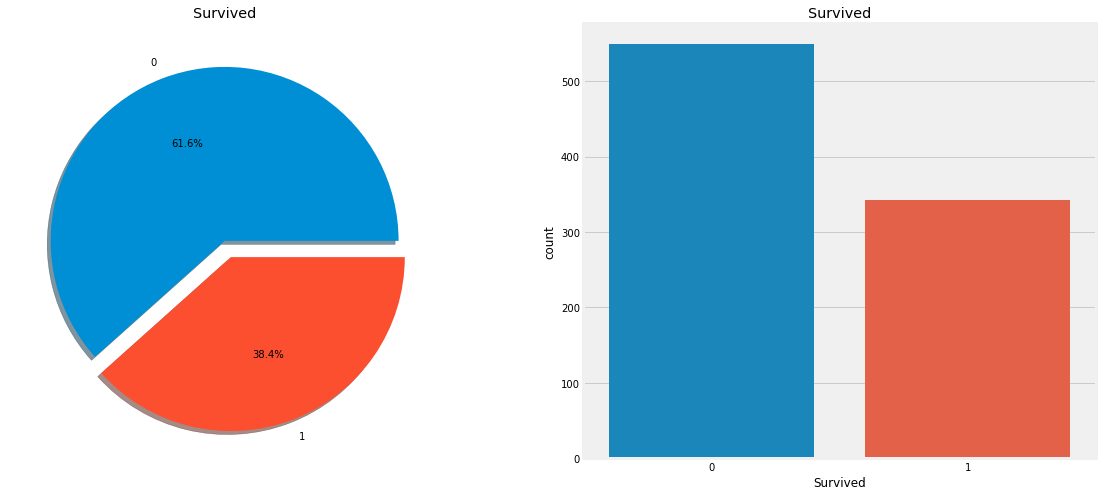

In [5]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')

plt.show

+ Not many survived (350 out of 891 in training set - 38.4% survival rate)
+ Features indclude sex, port of embarcation, age, etc.

### Types of Features
#### Categorical Features (=Nominal Variables):
+ Each and every value in a feature falls into two or more categories
    - eg) 2 categories; sex - male & female
    - In this dataset, **sex & embarked** belong to this group
+ Ordinal Features
    - Similar to categorical values
    - Difference - there exist relative ordering / sorting btw the values
    - eg) Height; tall / medium / short
    - In this dataset, **pclass** belongs to this group
+ Continuous Features:
    - Taking values btw any two points / btwn the min or max values in the features col
    - In this dataset, **age** belongs to this group

### Analyzing the Features
### Set --> Categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

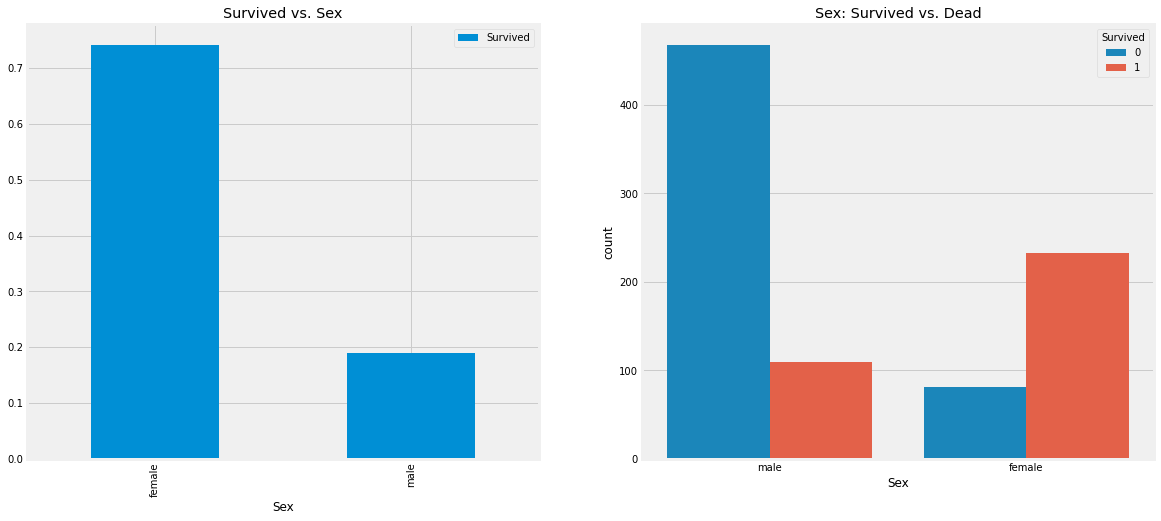

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt. show()

+ Women survival rate ~75%
+ Men survival rate ~18-19%

### Pclass --> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


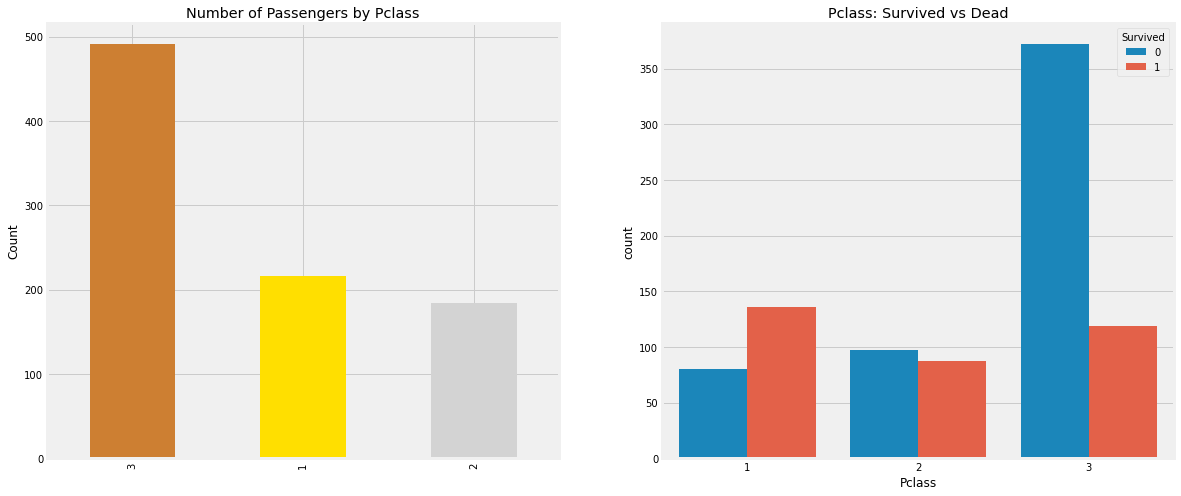

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#d3D3D3'], ax = ax[0])

ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

+ Pclass 1 given a very high priority, survival rate ~ 63%
+ Pclass 2 survival rate = 48%
+ Pclass 3 survival rate ~ 25%

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

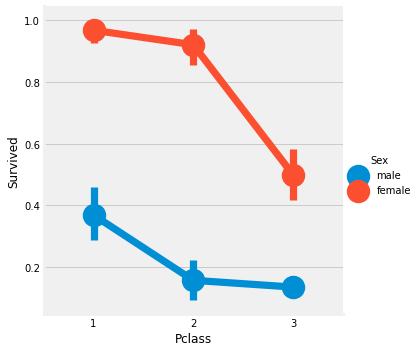

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

+ Women & Pclass1 survival rate ~95-96%

### Age --> Continuous Feature

In [12]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


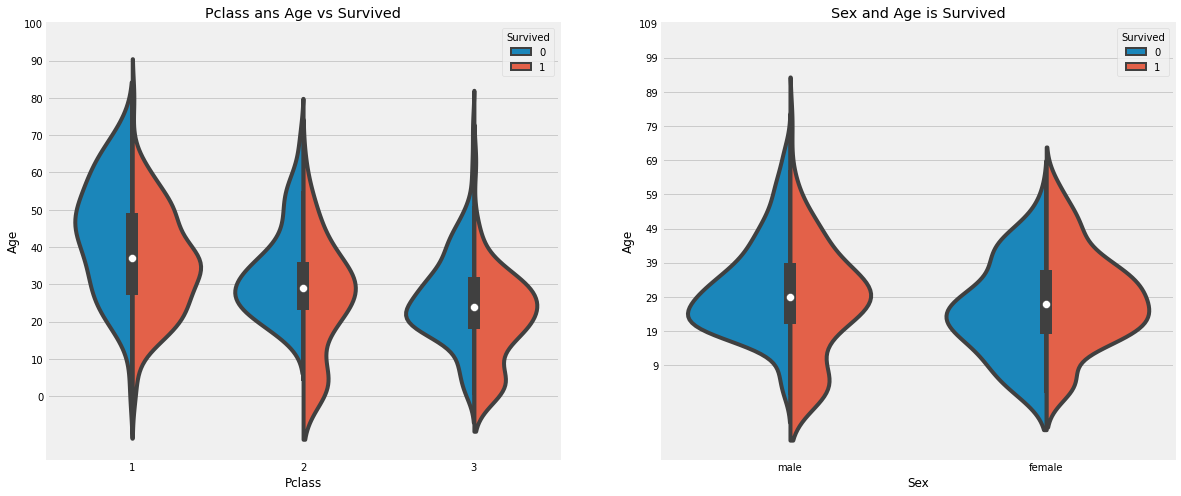

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass ans Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age is Survived')
ax[1].set_yticks(range(9, 110, 10))

plt.show()

**Observiations:**
1) # of children increases w. Pclass & survival rate for passengers below age 10 (i.e. children) seems consistent regardless of Pclass<br>
2) Survival chances for 20-50 year-olds from Pclass 1 is high & even better for women<br>
3) Survival chances decrease w. an increased Age in male

+ 177 null values in Age feature
    - NaN --> the mean age
    - Name feature considered for assigning age
    - eg) Names including Mr & Mrs  given w. its repective group's mean

**What's in a Name?' --> Feature**

In [14]:
data['Initial'] = 0

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # Salutation extration

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r') #Checking the Initials w. the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Misspelling replaced

In [16]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace = True)

In [17]:
data.groupby('Initial')['Age'].mean() # Avg age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [18]:
# Assigning the NaN values w. the ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any()

False

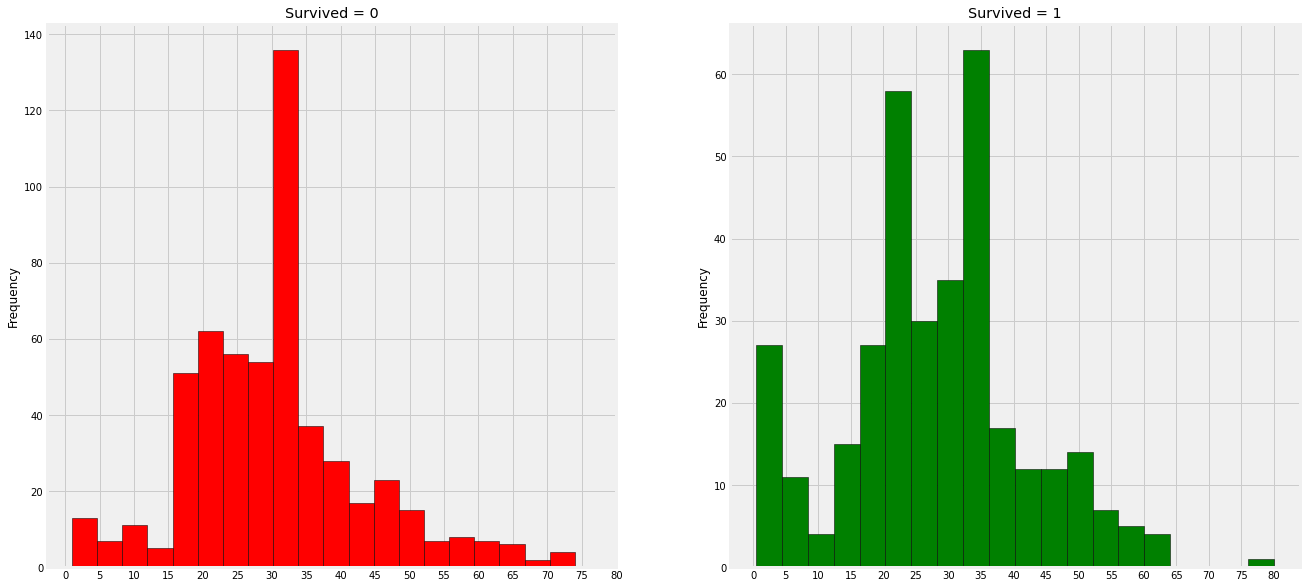

In [20]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')

ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')

ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

**Observations:**
1) Toddlers (Age < 5) saved in large #s<br>
2) The oldest was saved<br>
3) Max # of deaths in the age group of 30 - 40

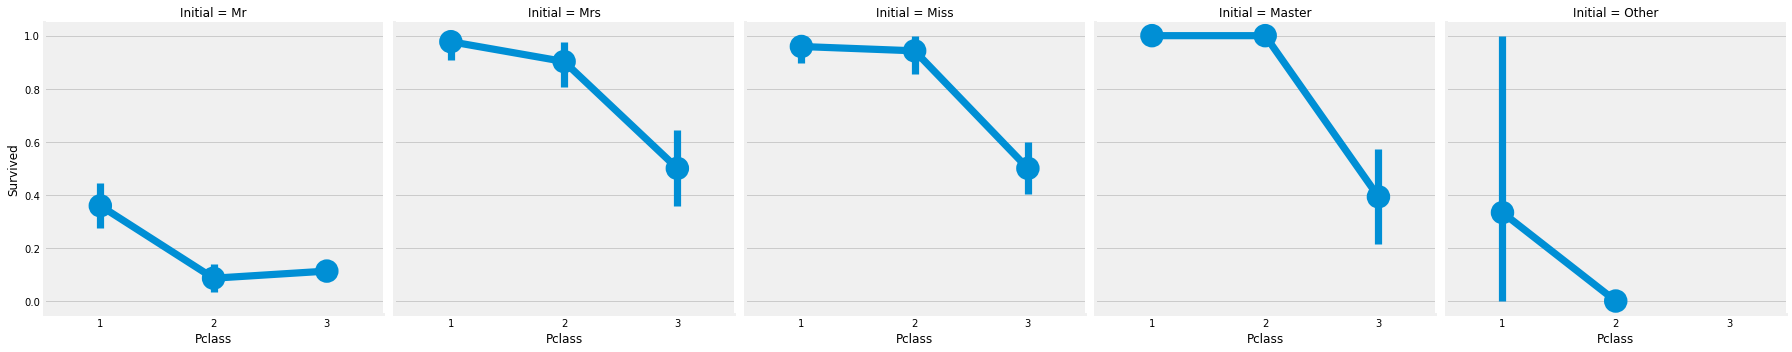

In [21]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

### Embarked --> Categorical Value

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins= True).style.background_gradient(cmap = 'summer_r')

**Chances of survival by Port of Embarkation**

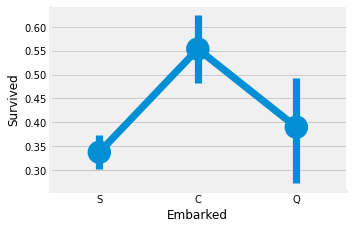

In [23]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

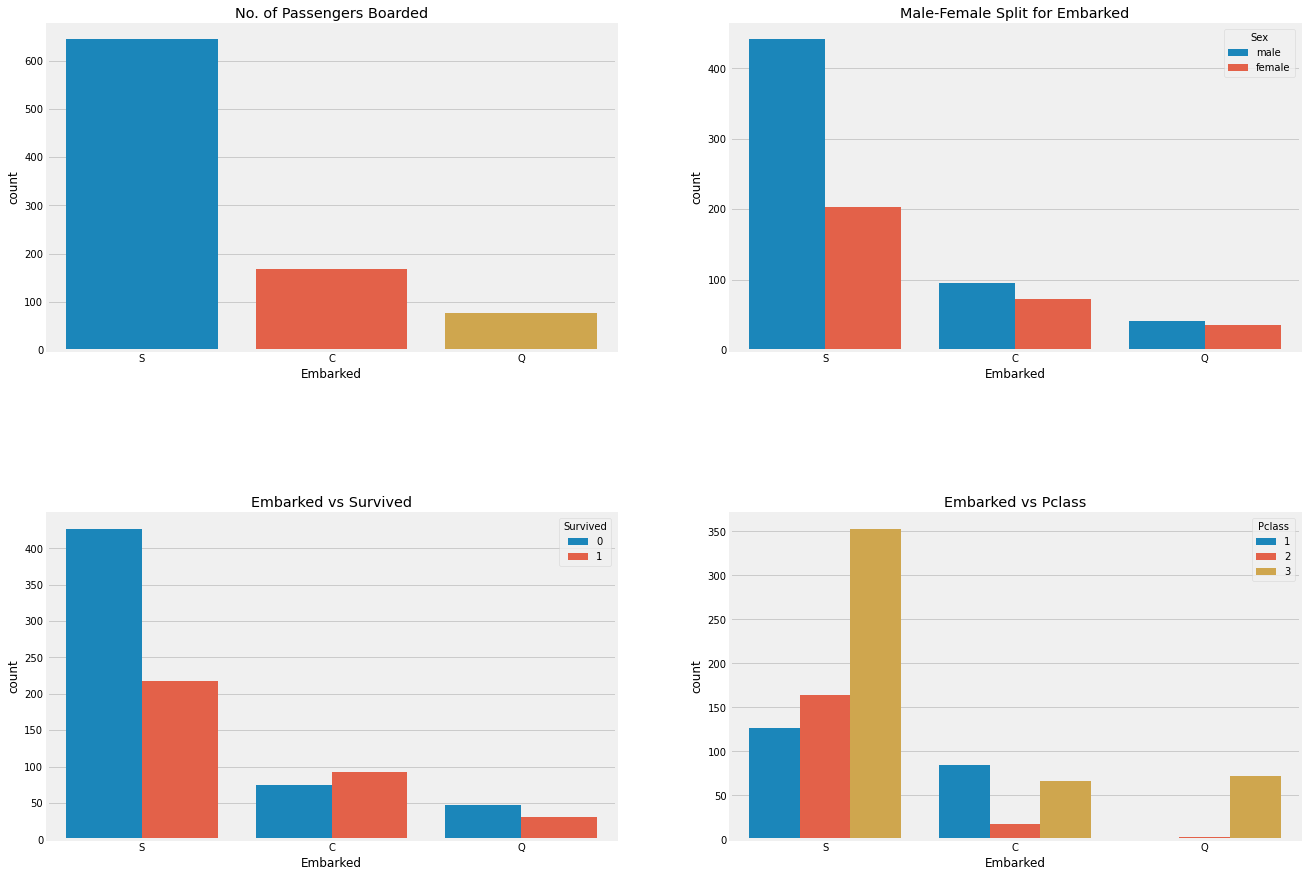

In [24]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observiations:**
1) Max. passengers boarded from S. Majority being from Pclass 3<br>
2) Good proportion of the passengers from C survived (maybe most of 'em are Pclass 1 or 2?)<br>
3) The embark S had richer peops, though survival chance is low since many from Pclass 3 boarded also (~81% did not survive)
4) Port Q had ~95% passengers from Pclass3

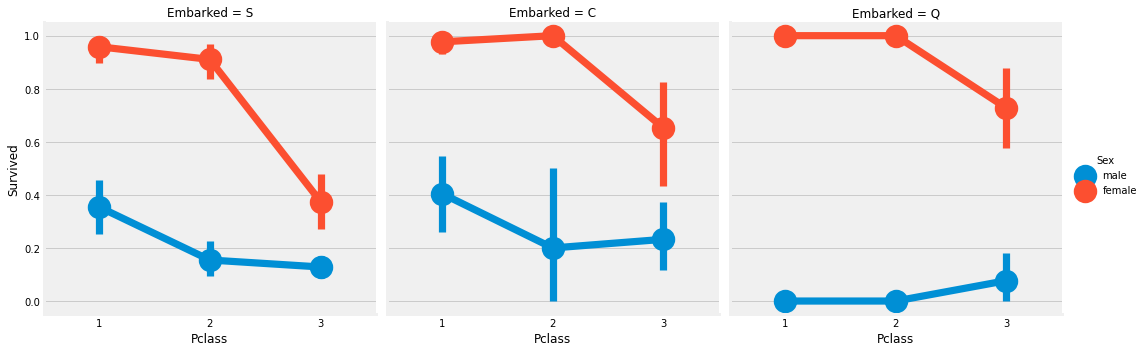

In [25]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

**Observation:**
1) Women's survival rate ~ 1 for Pclass 1 & 2 regardless of Port<br>
2) Port S has low survival rate for both genders<br>
3) Port Q has low survival for Men since almost all were from Pclass 3

**Filling Embarked NaN**<br>
Max. passengers boarded from Port S --> NaN replaced w. S

In [26]:
data['Embarked'].fillna('S', inplace = True)

In [27]:
data.Embarked.isnull().any()

False

### SibSip --> Discrete Feature
Whether a person is alone or w. his fam

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


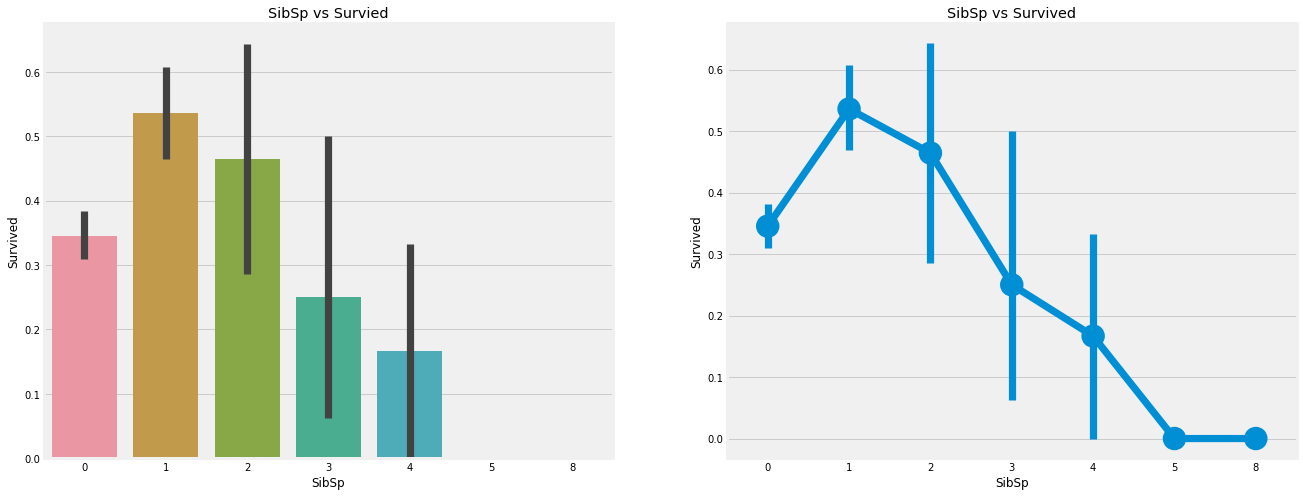

In [29]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))

sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survied')

# sns.factorplot('SibSp', 'Survived', data = data, ax = ax[1]) figure-level function
sns.pointplot('SibSp', 'Survived', data = data, ax = ax[1]) # axis-level function
ax[1].set_title('SibSp vs Survived')

# plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:**
+ Alone - 34.5% survival rate
+ Roughly decreases if the # of siblings increases
+ Fam w. 5-8 members survival 0% << due to its Pclass

### Parch

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Larger fam in Pclass 3

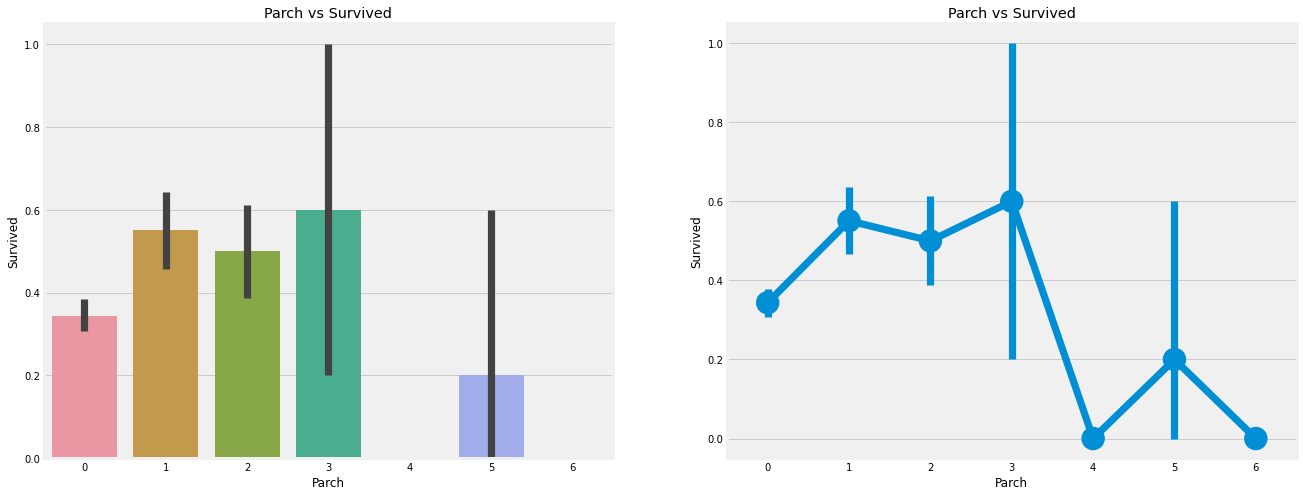

In [32]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))

sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')

# sns.factorplot('Parch', 'Survived', data = data, ax = ax[1])
sns.pointplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')

#plt.close(2)
plt.show()

### Fare --> Continuous Feature

In [33]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2042079685746


**Observations:**
+ Passengers w. parents w. greater survival chance
    - Reduces as the # increases
+ Good chance of survival for whom w. 1-3 parents
+ Chance decreases for whom w. 4 < parents

### Fare --> Continuous Feature

In [34]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2042079685746


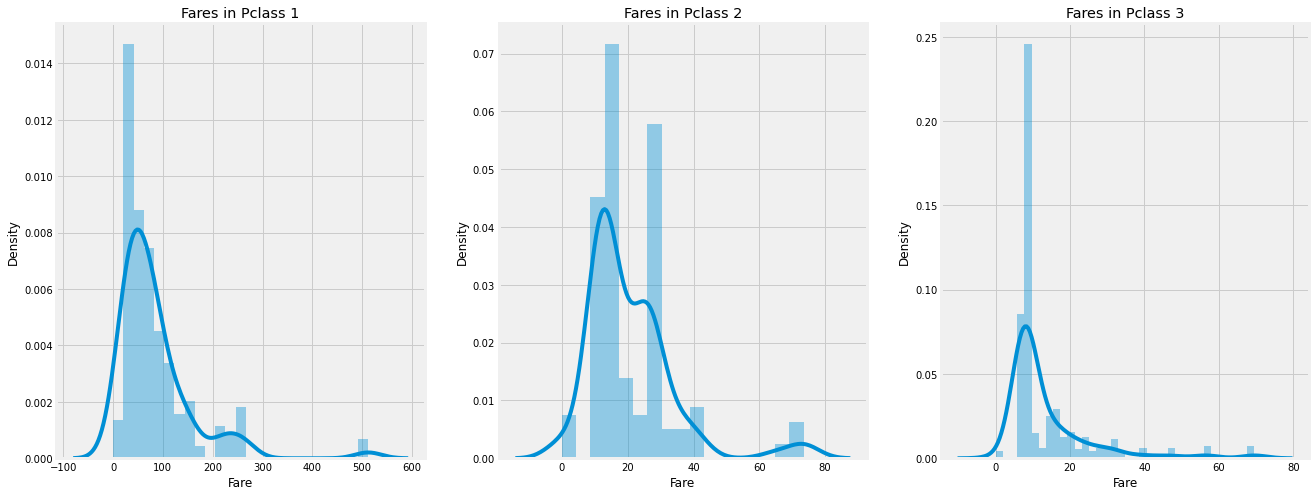

In [35]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

+ Large Fare dist in Pclass 1; decreases as standards reduce
+ Continous; convert into discrete values by binning

### Feature Observation Summary:
**Sex:** women > men <br>
**Pclass:** 1st > 2nd >>> 3rd <br>
**Age:** children(<5-10) > 15-35 <br>
**Embarked:** C > S > Q <br>
**Parch + SibSp:** 1-2 sib, sp OR 1-3 parents > alone / large fam

### Correlation btw the Features

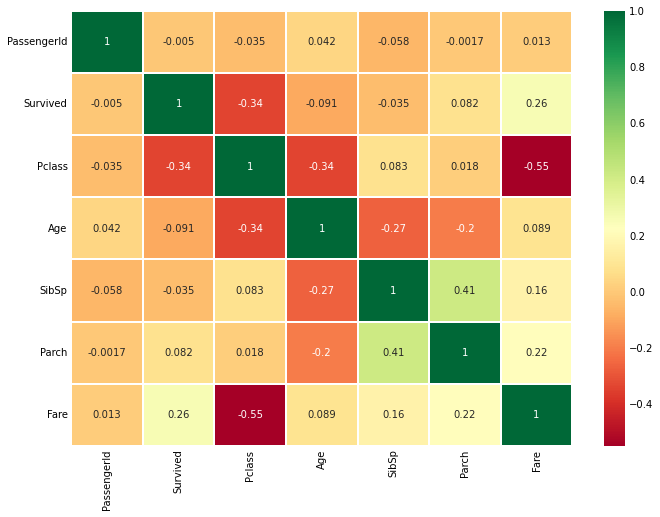

In [36]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

**Heatmap Interpretation**
+ Positive correlation: one feature is proportional to the other
+ Negative correlation: one feature is disproportional to the other
+ Multicolinearity: features containing highly similar info (no/small variance in info)

### Part 2 Feature Engineering and Data Cleaning
+ Unimportant, redundant features to be eliminated
+ Addition of new important features
+ Info extraction from other features

### Age_band
**Prob w. age feature:**
+ Age = continuous feature
+ Prob in machine learning models
    - For instance, Sex easily segregated by male vs. female
    - Age requires categorical values within its continous values by binning OR normalization --> binning will be used here (group a range of ages into a single bin or assign them a single value)
    - Max. age = 80
    - Divide the range 0-80 by 5 = 16 (=bins of size)

In [37]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r') # # of pass. in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


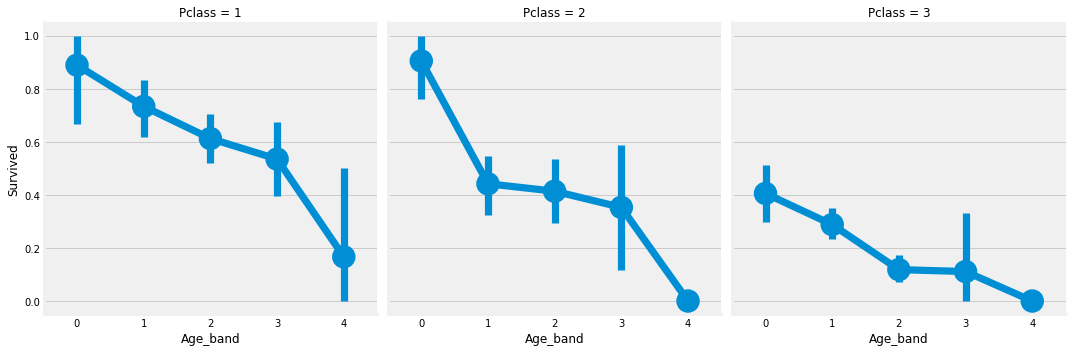

In [39]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')
plt.show()

Survival rate decreases as the age increases regardless of the Pclass

### Fam_Size & Alone
+ New features = 'Family_size', 'Alone' (summation of Parch & Sibsp)

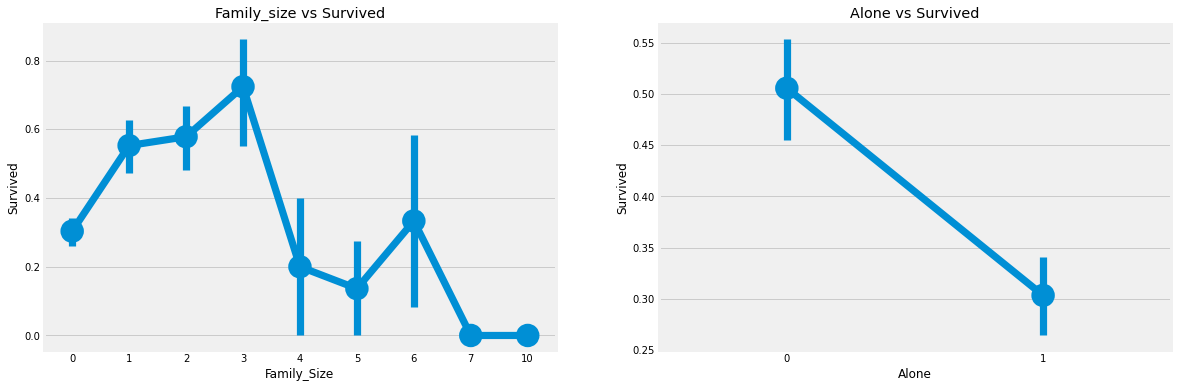

In [40]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # fam size

data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1 # alone

f, ax = plt.subplots(1, 2, figsize = (18, 6))

# sns.factorplot('Family_Size', 'Survived', data = data, ax = ax[0])
sns.pointplot('Family_Size', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Family_size vs Survived')

# sns.factorplot('Alone', 'Survived', data = data, ax = ax[1])
sns.pointplot('Alone', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Alone vs Survived')

# plt.close(2)
# plt.close(3)

plt.show()

+ Family_Size = 0; alone passenger
+ Alone - low chance of survival
+ Family_Size > 4 - decreasing chance of survival

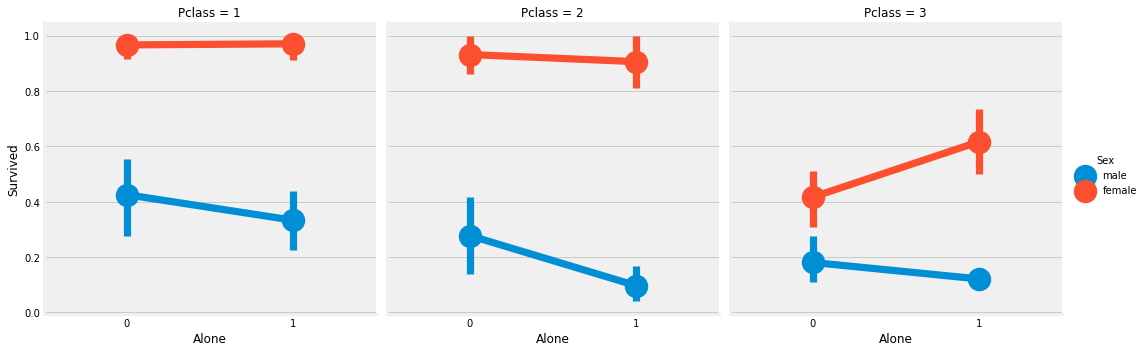

In [41]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

+ Being alone alert! regardless of Sex/Pclass
+ Except for Pclass3 since there are many more females who are alone than those w. fam

### Fare_Range
+ Fare = continuous --> ordinal value by pandas.qcut
+ qcut; splits OR arranges the values according the # of bins set
    - eg) 5 bins set --> the values equally spaced into 5 separate bins / value ranges

In [42]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


+ Fare_range increases --> survival chance increases
+ Fare_range values cannot be passed as is --> to be converted into singleton values like done in Age_Band

In [43]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

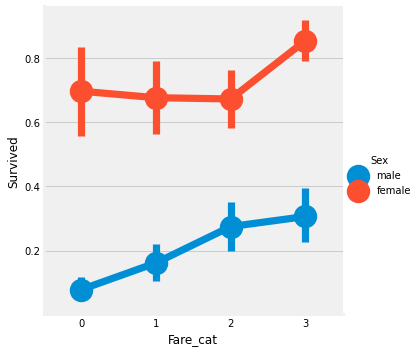

In [44]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

+ Fare_cat increases --> survival chances increase
+ May become an important feature during modeling along w. the Sex

### Converting String Values into Numeric
+ Strings cannot be passed in machine learning model
+ Sex, Embarked, etc. require conversion to numerical values

In [45]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace = True)

**Drop Unneeded Features**<br><br>
**Name** --> not useable<br>
**Age** --> Age_band will replace the feature<br>
**Ticket** --> any random string that cannot be categorized<br>
**Fare** --> Fare_cat will replace the featrue<br>
**Cabin** --> Too many NaN values + passengers w. multiple cabins<br>
**Fare_Range** --> Fare_cat will replace the feature<br>
**PassengerID** --> cannot be categorized<br>

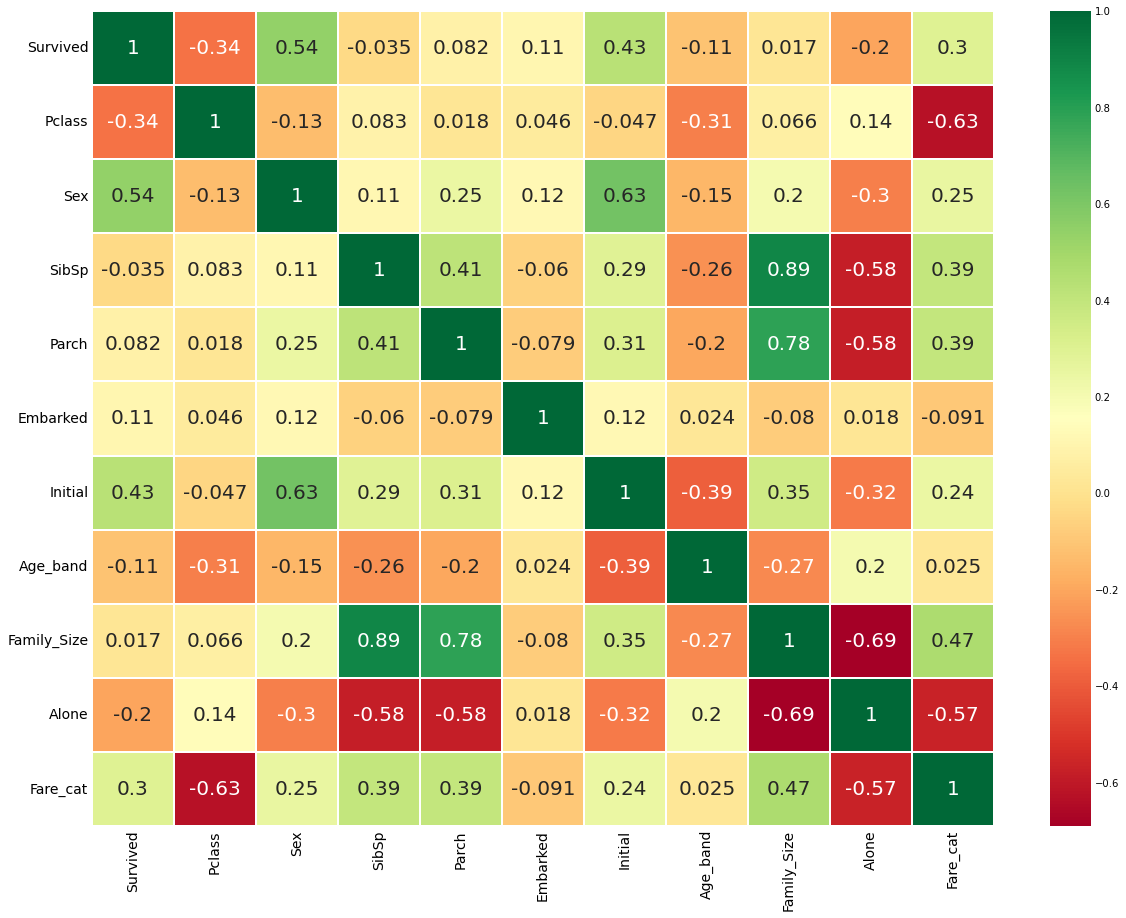

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)

sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

+ Positively related features: SibSp - Family_Size, Parch - Family_size
+ Negatively related features: Alone - Family_Size

### Part 3 Predictive Modeling
+ Insignts gained from EDA
+ Classification algorithms to be used to predict passenger survival
+ Algorithms used to make the model:
    - Logistic Regression
    - Support Vector Machines (linear and radial)
    - Random Forest
    - K-Nearest Neighbours
    - Naive Bayes
    - Decision Tree
    - Logistic Regression

In [47]:
# import all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [48]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Macines (rbf-SVM)

In [49]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine (linear-SVM)

In [50]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is  0.8134328358208955


### Decision Tree

In [52]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is  0.8134328358208955


### K-Nearest Neighbors (KNN)

In [53]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy of KNN is  0.8134328358208955


+ The accuracy of KNN model changes as the value of n_neighbors attribute is changed
+ Default = 5

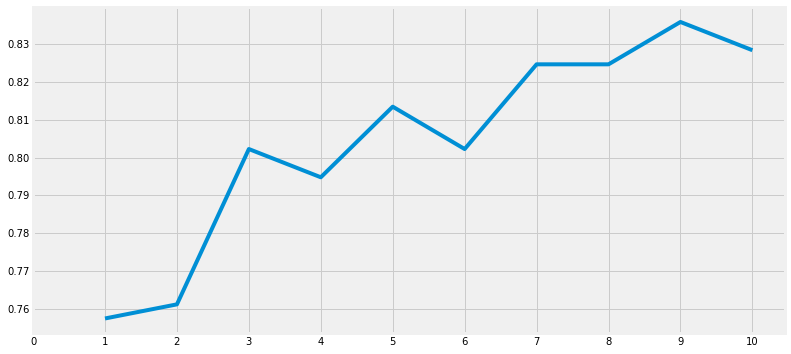

Accuracies for different values of n are:  [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [54]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are: ', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [55]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

Accuracy for NaiveBayes is  0.8134328358208955


### Random Forests

In [56]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forest is ', metrics.accuracy_score(prediction7, test_Y))

Accuracy for Random Forest is  0.8246268656716418


+ Accuracy isn't the only factor that determines the robustness of the classifier
+ As the training & test dataset change, the accuracy will change also --> model variance
+ **Cross validation** used to overcome such & get generalized model

## Cross Validation
+ Data imbalance is common --> train & test algorithm on every instance of the dataset is crucial --> avg. of all the noted accuracies over the dataset<br>
    1) The K-Fold Cross Validation; divide dataset into k-subsets<br>
    2) For instance, k = 5, dataset / 5 parts --> 1 part is reserved for testing & 4 parts will be used for algorithm training<br>
    3) The process continues by changing the test part in each iteration & training the algorithm over the other parts --> accuracies & errors averaged to get an avg. accuracy of the algorithm<br>
    4) An algorithm may be underfitted / overfitted --> generalized model established via cross-validation<br>

In [57]:
from sklearn.model_selection import KFold # k-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits = 10) # k=10, split the data into 10 equal parts // random_state = 22 removed
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'Std':std}, index = classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813770,0.042219
Decision Tree,0.803658,0.032516
Naive Bayes,0.801386,0.028999
Random Forest,0.808127,0.035376


<AxesSubplot:>

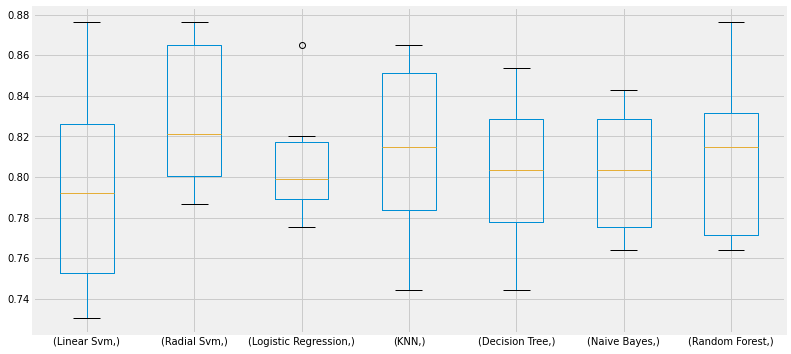

In [58]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

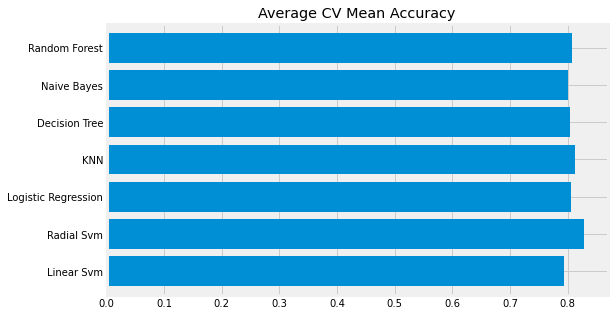

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)

plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)

plt.show()

+ It may be misleading due to imbalance
+ Summarized result w. confusion matrix showing where it went wrong / which class the model predicted wrong

### Confusion Matrix
+ \# of correct & incorrect classifications confirmed

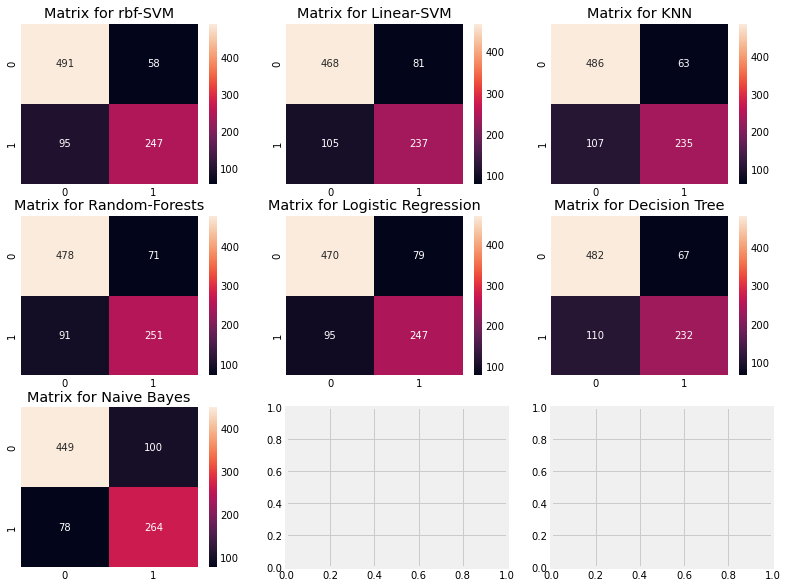

In [60]:
f,ax = plt.subplots(3, 3, figsize = (12, 10))

y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,0], annot = True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel = 'linear'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,1], annot = True, fmt = '2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors = 9), X, Y,cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,2], annot = True, fmt = '2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 100), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,0], annot = True, fmt = '2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,1], annot = True,fmt = '2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1,2], annot = True, fmt = '2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[2,0], annot = True, fmt = '2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
plt.show()

### Confusion Matrix Interpretation
+ left diagonal; # of correct predictions made for each class
+ right diagonal; # of wrong predictions made for each class
+ Close look # the 1st plot for rbf-SVM:
    - \# of correct preds = 491 (dead) + 247 (survived) / mean CV accurcay = (491 + 247) / 891 = 82.8%
    - \# of wrong preds = 58 (dead as survived) + 95 (survived as dead_more)
    - rbf-SVM w. higher chance in correct prediction for the dead
    - NaiveBayes w. higher chance in correct prediction for the survived

### Hyper-Parameters Tuning
+ Machine learning models carry default parameter values that can be customized
    - Hyper-parameters i.e. C and gamma in the SVM model, etc.
    - Hyper-parameter tuning; change the learning rate of the algorithm --> achieve better model
+ SVM & RandomForests (2 best) are hyper-parmeter tuned

**SVM**

In [61]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel,'C': C,'gamma': gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)

gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


**Random Forests**

In [62]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)

gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling
+ Contributes to increase the accuracy/performance of a model
+ Combination of various simple models to create a single powerful model
+ Improves stability of the model
+ How it's done:
    - Voting Classifier
    - Bagging
    - Boosting

### Voting Classifier
+ The simplest way of combining predictions from many different simple machine learning models
+ An avg. prediction result based on the prediction of all the submodels (all of different types)

In [63]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors = 10)),
                                                  ('RBF', svm.SVC(probability = True, kernel = 'rbf',C = 0.5, gamma = 0.1)),
                                                  ('RFor', RandomForestClassifier(n_estimators = 500, random_state = 0)),
                                                  ('LR', LogisticRegression(C = 0.05)),
                                                  ('DT', DecisionTreeClassifier(random_state = 0)),
                                                  ('NB', GaussianNB()),
                                                  ('svm', svm.SVC(kernel = 'linear', probability = True))
                                                 ], 
                                    voting = 'soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is: ',ensemble_lin_rbf.score(test_X, test_Y))

cross=cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = "accuracy")

print('The cross validated score is ',cross.mean())

The accuracy for ensembled model is:  0.8208955223880597
The cross validated score is  0.8226716604244693


### Bagging
+ General ensemble method
+ Applying similar classifiers on small partitions of the dataset --> taking the avg. of all the preds
+ Averaging results in variance reduction
+ Makes use of similar classifiers (different from voting classifier)

**Bagged KNN**
+ Bagging works best with models with high variance / eg. Decision Tree or Random Forests
+ KNN with small value of n_neighbors, as small value of n_neighbors

In [64]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')

print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.832089552238806
The cross validated score for bagged KNN is:  0.8104244694132333


**Bagged Decision Tree**

In [65]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is:  0.8208955223880597
The cross validated score for bagged Decision Tree is:  0.8171410736579275


### Boosting
+ Ensembling technique using sequential learning of classifiers; step by step enhancement of a weak model
+ Works as follows:
    - A model is trained on the complete dataset
    - Both correct / incorrect instances will occur
    - In the next iteration, wrongly predicted instances will be focused / given more weight (attempts to predict the wrong instance correct)
    - Iterative process continues --> new classifers added to the model until the limit is reached on the accuracy

**AdaBoost (Adaptive Boosting)**
+ The weak learner or estimator here = Decsion Tree
+ Dafault base_estimator changed to any algorithm of our choice

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8249188514357055


**Stochastic Gradient Boosting**
+ Decision Tree identified again here as a weak learner

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


XGBoost

In [68]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

The cross validated score for XGBoost is:  0.8160299625468165


+ Highest accuracy for AdaBoost established
+ Try to increase it with Hyper-parameter tuning

**Hyper-Parameter Tuning for AdaBoost**

In [69]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


+ Max. accuracy got with AdaBoost = 82.94% w. n_estimators = 200 & learning_rate = 0.05

### Confusion Matrix for the Best Model

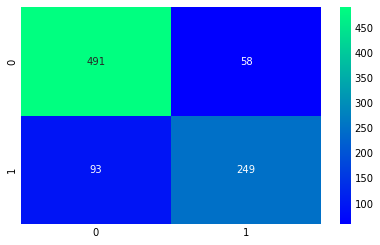

In [70]:
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.05)
result = cross_val_predict(ada, X, Y, cv=10)

sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')

plt.show()

### Feature Importance

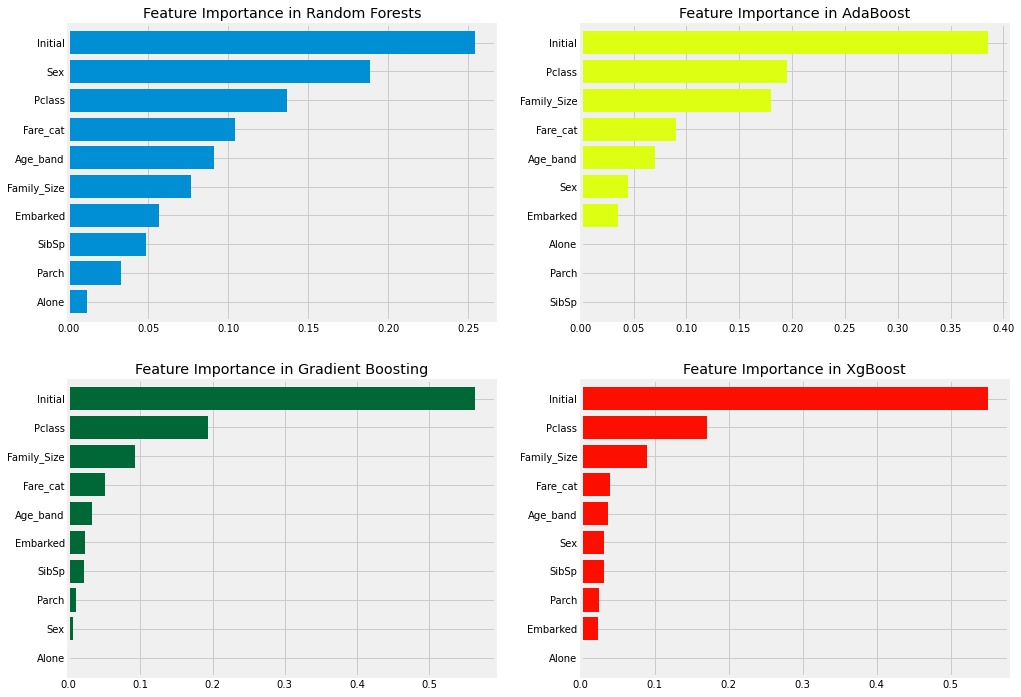

In [71]:
f, ax = plt.subplots(2, 2, figsize = (15, 12))

model = RandomForestClassifier(n_estimators = 500, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0,0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.05, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0, 1], color = '#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 0], cmap = 'RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 1], color = '#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')

plt.show()

**Observations:**
+ Common important features; Initial, Fare_cat, Pclass, Family_Size
+ Sex w. low importance --> highly unexpected (considering Sex combined with Pclass resulted in a very good differentiating factor) / appeared as important only in RandomForests
+ Initial observed at the top in many classifiers; earlier confirmed w. positive correlation btw Sex and Initial, which both refer to gender
+ Similar w. Pclass & Fare_cat refer to the status of the passengers and Family_Size with Alone, Parch and SibSp